In [6]:
import pickle
from sklearn.cluster import KMeans

# path = '../../data/pointmaze-medium-v0.pkl'
path = './data/pointmaze-medium-v0.pkl'

with open(path, 'rb') as fp:
    dataset = pickle.load(fp)

nclusters = 40

observations = dataset['observations']['observation']
achieved_goals = dataset['observations']['achieved_goal']

kmeans = KMeans(n_clusters=nclusters, n_init="auto").fit(observations[:, :2])

In [7]:
labels = kmeans.labels_ # (1000000,)
import random
import numpy as np
rng = np.random.default_rng(seed=None)
idxs_selected = rng.choice(len(labels), size=10000, replace=False)

points_selected = achieved_goals[idxs_selected]
labels_selected = labels[idxs_selected]


In [15]:
points_selected.max()
points_selected.min()

-2.8961816

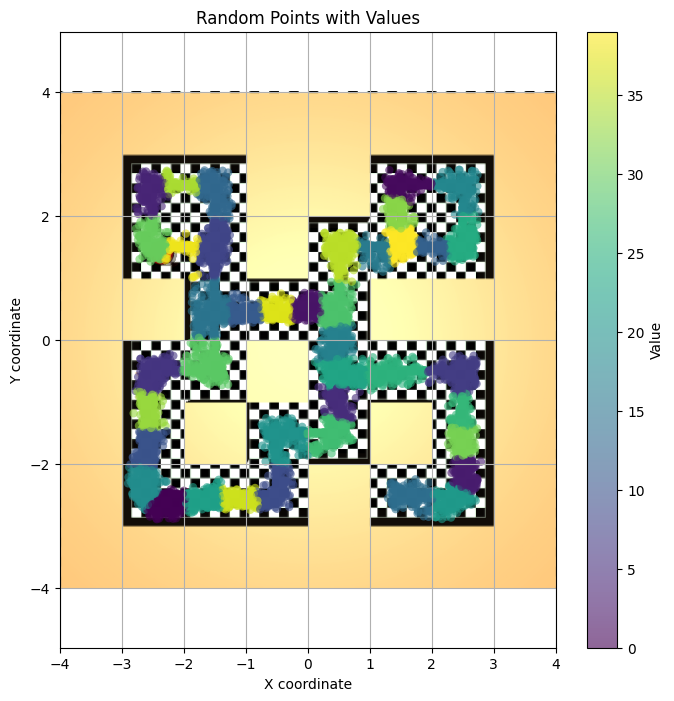

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
num_points = 10000
# x = np.random.uniform(-5, 5, num_points)
# y = np.random.uniform(-5, 5, num_points)
# values = np.random.uniform(0, 10, num_points)  # Values for each point

x = points_selected[:, 0]
y = points_selected[:, 1]

# Create scatter plot
plt.figure(figsize=(8, 8), dpi=100)  # Set equal aspect ratio viridis

bg_fpath = './scripts/visualization/bg-ant-medium-crop.png'
bg_image = plt.imread(bg_fpath)
# plt.imshow(bg_image, extent=[-5, 5, -5, 5], aspect='auto')  # Set the extent if necessary
plt.imshow(bg_image, extent=[-4, 4, -4, 4], aspect='auto')  # Set the extent if necessary

plt.scatter(x, y, c=labels_selected, cmap='viridis', alpha=0.6, edgecolor='none')
plt.colorbar(label='Value')  # Add color bar to indicate the values
plt.title('Random Points with Values')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(True)
plt.axis('equal')  # Ensure equal scaling of x and y axes
plt.show()


(-5.0, 5.0, -5.0, 5.0)

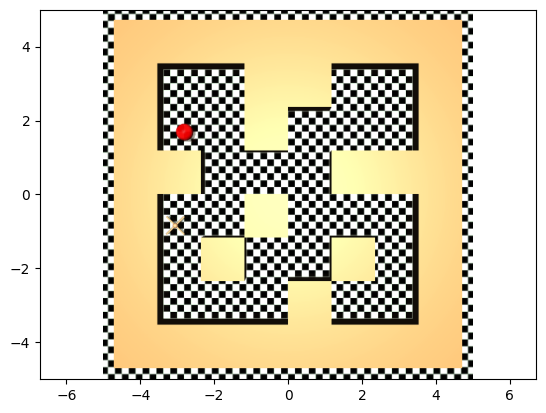

In [11]:
import gymnasium as gym
import mediapy as mpy
import os
os.environ['PYOPENGL_PLATFORM'] = 'egl'
os.environ['MUJOCO_GL'] = 'egl'
env = gym.make('AntMaze_Medium-v4', render_mode='rgb_array')
env.reset()
img = env.render()
# mpy.show_image(img)
import imageio
bg_fpath = './scripts/visualization/bg-ant-medium.png'
imageio.imsave(bg_fpath, img)
bg_image = plt.imread(bg_fpath)
plt.imshow(bg_image, extent=[-5, 5, -5, 5], aspect='auto')  # Set the extent if necessary
plt.axis('equal')  # Ensure equal scaling of x and y axes
